# CIFAR-10 Classification with CNN

In [1]:
import torch
import torchvision
from torchvision import datasets

from torch import nn
from torch import optim

from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor

import math
import matplotlib.pyplot as plt

import neural_nets
import cnn_utils as util

In [2]:
torch.manual_seed(42)

## Import Data

### Download Dataset

In [3]:
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


### Create Loaders

This step is needed in order to automate the loading of images with set batch size.

In [4]:
batch_size = 256

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=training_data,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=batch_size,
                                          shuffle=True)

### Set general parameters

In [6]:
input_dimensions = (32,32)
target_classes = 10

## Simpe 2-layer CNN

In [7]:
cnn = neural_nets.CNN(n_conv_layers=2,
                      filters=[32, 64],
                      kernel=[3, 3],
                      activation=['relu', 'relu'],
                      norm=[False, False],
                      pool=[2, 2],
                      input_channels=3,
                      fully_connected=[128],
                      input_dims=input_dimensions,
                      classes=target_classes)

Let's view the network architecture created by the class and the number of parameters that need to be learned:

In [8]:
print(cnn)

CNN(
  (conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc_layers): ModuleList(
    (0): Linear(in_features=4096, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [9]:
params = list(cnn.parameters())
print("The number of learnable parameter sets is:", len(params))
print()

total_params = 0
for p in params:
    print(p.size())
    total_params += math.prod(list(p.size()))
    

print()
print("Total number of parameters:", total_params)

The number of learnable parameter sets is: 8

torch.Size([32, 3, 3, 3])
torch.Size([32])
torch.Size([64, 32, 3, 3])
torch.Size([64])
torch.Size([128, 4096])
torch.Size([128])
torch.Size([10, 128])
torch.Size([10])

Total number of parameters: 545098


We can observe that the fully connected layers add a significant number of parameters that need to be trained.

### Train Network

For a baseline, a simple 2-layer version can be created in order to compare it to other configurations.

First, we need to define the training hyperparameters, along with a loss function and an optimizer.

In [10]:
num_epochs = 50
learning_rate = 0.001

In [11]:
cross_entropy = nn.CrossEntropyLoss()
adam = optim.Adam(cnn.parameters(), lr=learning_rate)

Initial experiments with varying batch size and learning rate showed that those hyperparameters did not significantly affect test accuracy while having an effect on training times, so the combination that resulted in the least training time was chosen.

On the other hand, the number of epochs was chosen to be 50 since by this point the accuracy has peaked and is either plateauing or declining.

Finally, we run the training loop for the amount of epochs specified and plot the training loss and test accuracy after each epoch.

In [12]:
losses, accuracies = util.train_loop(model=cnn,
                                     loss_fn=cross_entropy,
                                     optimizer=adam,
                                     train_loader=train_loader,
                                     test_loader=test_loader,
                                     epochs=num_epochs,
                                     verbose=1)

Epoch: 1/50, Loss: 1.4451
Epoch: 1/50, Test Acc.: 53.58%
Epoch: 2/50, Loss: 1.0125
Epoch: 2/50, Test Acc.: 61.11%
Epoch: 3/50, Loss: 0.7954
Epoch: 3/50, Test Acc.: 65.74%
Epoch: 4/50, Loss: 0.8902
Epoch: 4/50, Test Acc.: 66.79%
Epoch: 5/50, Loss: 0.9099
Epoch: 5/50, Test Acc.: 67.68%
Epoch: 6/50, Loss: 0.8540
Epoch: 6/50, Test Acc.: 68.54%
Epoch: 7/50, Loss: 0.9330
Epoch: 7/50, Test Acc.: 68.71%
Epoch: 8/50, Loss: 0.8401
Epoch: 8/50, Test Acc.: 70.66%
Epoch: 9/50, Loss: 0.8702
Epoch: 9/50, Test Acc.: 69.33%
Epoch: 10/50, Loss: 0.8982
Epoch: 10/50, Test Acc.: 70.28%
Epoch: 11/50, Loss: 0.5713
Epoch: 11/50, Test Acc.: 70.63%
Epoch: 12/50, Loss: 0.5614
Epoch: 12/50, Test Acc.: 69.27%
Epoch: 13/50, Loss: 0.6797
Epoch: 13/50, Test Acc.: 70.37%
Epoch: 14/50, Loss: 0.7613
Epoch: 14/50, Test Acc.: 69.07%
Epoch: 15/50, Loss: 0.5861
Epoch: 15/50, Test Acc.: 70.61%
Epoch: 16/50, Loss: 0.5283
Epoch: 16/50, Test Acc.: 70.95%
Epoch: 17/50, Loss: 0.6574
Epoch: 17/50, Test Acc.: 71.26%
Epoch: 18/50, L

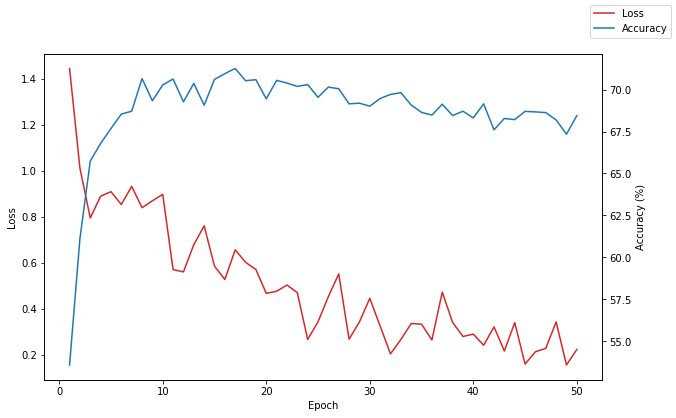

In [13]:
util.plot_loss(losses, accuracies)